# Computer Vision - Image Classification

## Load Modules

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from google.colab import files
import os
from PIL import Image
import requests
import io
import numpy as np
from tensorflow.keras.applications import (
        vgg16,
        inception_v3
    )

## Initializing models

In [ ]:
# init the models
vgg_model = vgg16.VGG16(weights='imagenet')

inception_model = inception_v3.InceptionV3(weights='imagenet')


## Download Image
- you can use copyright free images from unsplash
- download an image from unsplash, rename it test_image and upload it to google colab

In [ ]:
filename = "/content/test_image.jpg"

## Load Image

PIL image size (224, 224)


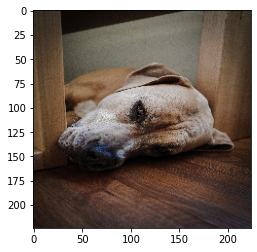

In [ ]:
# load an image in PIL format
original_224 = load_img(filename, target_size=(224, 224))
original_299 = load_img(filename, target_size=(299, 299))
print('PIL image size',original_224.size)
plt.imshow(original_224)
plt.show()

## Format Image

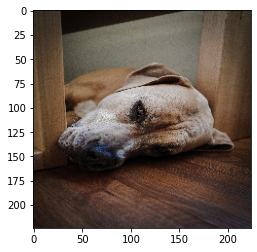

numpy array size (224, 224, 3)


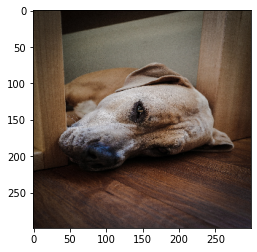

numpy array size (299, 299, 3)


In [ ]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image_224 = img_to_array(original_224)
plt.imshow(np.uint8(numpy_image_224))
plt.show()
print('numpy array size',numpy_image_224.shape)

numpy_image_299 = img_to_array(original_299)
plt.imshow(np.uint8(numpy_image_299))
plt.show()
print('numpy array size',numpy_image_299.shape)

image batch size (1, 224, 224, 3)
image batch size (1, 299, 299, 3)


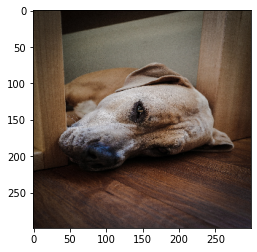

In [ ]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch_224 = np.expand_dims(numpy_image_224, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

image_batch_299 = np.expand_dims(numpy_image_299, axis=0)
print('image batch size', image_batch_299.shape)
plt.imshow(np.uint8(image_batch_299[0]))

## Preprocess Image
- Preprocess the input by subtracting the mean value from each channel of the images in the batch. Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet. The values for ImageNet are : [ 103.939, 116.779, 123.68 ]. This is done using the preprocess_input() function.

In [ ]:
# prepare the image for the VGG model
processed_vgg_image_224 = vgg16.preprocess_input(image_batch_224.copy())
processed_vgg_image_299 = vgg16.preprocess_input(image_batch_299.copy())

In [ ]:
# prepare the image for the inception model
processed_inception_image_224 = inception_v3.preprocess_input(image_batch_224.copy())
processed_inception_image_299 = inception_v3.preprocess_input(image_batch_299.copy())

## Make Predictions

### vgg16 preprocessing with vgg16 model

In [ ]:
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_vgg_image_224)
# print predictions
# convert the probabilities to class labels
# we will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
# print VGG16 predictions
for prediction_id in range(len(label_vgg[0])):
    print(label_vgg[0][prediction_id])

('n02088238', 'basset', 0.179466)
('n02088364', 'beagle', 0.10092248)
('n02093428', 'American_Staffordshire_terrier', 0.08201592)
('n02088632', 'bluetick', 0.078622796)
('n02090379', 'redbone', 0.06535849)


### inception v3 preprocessing with vgg16 model

In [ ]:
predictions = vgg_model.predict(processed_inception_image_224)
label_vgg = decode_predictions(predictions)
for prediction_id in range(len(label_vgg[0])):
    print(label_vgg[0][prediction_id])

('n03788365', 'mosquito_net', 0.24694502)
('n15075141', 'toilet_tissue', 0.034464862)
('n04209239', 'shower_curtain', 0.024068523)
('n02804414', 'bassinet', 0.0152387805)
('n03887697', 'paper_towel', 0.014675174)


### inception v3 preprocessing with inception v3 model

In [ ]:
predictions = inception_model.predict(processed_inception_image_299)
label_inception = decode_predictions(predictions)
for prediction_id in range(len(label_inception[0])):
    print(label_inception[0][prediction_id])

('n02109047', 'Great_Dane', 0.49977627)
('n02087394', 'Rhodesian_ridgeback', 0.19904947)
('n02093428', 'American_Staffordshire_terrier', 0.04342728)
('n02108422', 'bull_mastiff', 0.027964238)
('n02100583', 'vizsla', 0.0200232)


### vgg16 preprocessing with inception v3 model

In [ ]:
predictions = inception_model.predict(processed_vgg_image_224)
label_inception = decode_predictions(predictions)
for prediction_id in range(len(label_inception[0])):
    print(label_inception[0][prediction_id])

('n06359193', 'web_site', 1.0)
('n02879718', 'bow', 5.4223737e-13)
('n04328186', 'stopwatch', 3.0355094e-13)
('n01924916', 'flatworm', 6.280364e-17)
('n02089973', 'English_foxhound', 1.5937929e-25)


# Natural Language Processing - Sentiment Analysis

## Load modules

In [7]:
# utilities
import re
import numpy as np
import pandas as pd
import string

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

## Load dataset

In [57]:
dataset = pd.read_csv("/content/tweet-sentiment-subset.csv")

### Punctuation removal

In [58]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [59]:
#storing the puntuation free text
dataset['text']= dataset['text'].apply(lambda x:remove_punctuation(x))
dataset.head()

,Unnamed: 0,text,target
0,800000,I LOVE Health4UandPets u guys r the best,1
1,800001,im meeting up with one of my besties tonight C...,1
2,800002,DaRealSunisaKim Thanks for the Twitter add Sun...,1
3,800003,Being sick can be really cheap when it hurts t...,1
4,800004,LovesBrooklyn2 he has that effect on everyone,1


### Cleaing Repeating Characters

In [60]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [61]:
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].head()

0            I LOVE Health4UandPets u guys r the best 
1    im meeting up with one of my besties tonight C...
2    DaRealSunisaKim Thanks for the Twitter add Sun...
3    Being sick can be really cheap when it hurts t...
4       LovesBrooklyn2 he has that effect on everyone 
Name: text, dtype: object

### Cleaning and Removing URLs

In [62]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

In [63]:
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head()

0            I LOVE Health4UandPets u guys r the best 
1    im meeting up with one of my besties tonight C...
2    DaRealSunisaKim Thanks for the Twitter add Sun...
3    Being sick can be really cheap when it hurts t...
4       LovesBrooklyn2 he has that effect on everyone 
Name: text, dtype: object

### Converting to lower case

In [64]:
dataset['text']= dataset['text'].apply(lambda x: x.lower())
dataset['text'].head()

0            i love health4uandpets u guys r the best 
1    im meeting up with one of my besties tonight c...
2    darealsunisakim thanks for the twitter add sun...
3    being sick can be really cheap when it hurts t...
4       lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

### Tokenize

In [65]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [66]:
#applying function to the column
dataset['text']= dataset['text'].apply(lambda x: tokenization(x))
dataset['text'].head()

0          [i love health4uandpets u guys r the best ]
1    [im meeting up with one of my besties tonight ...
2    [darealsunisakim thanks for the twitter add su...
3    [being sick can be really cheap when it hurts ...
4     [lovesbrooklyn2 he has that effect on everyone ]
Name: text, dtype: object

### Stopword removal

In [67]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
stopwords = nltk.corpus.stopwords.words('english')

In [69]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [70]:
#applying the function
dataset['text']= dataset['text'].apply(lambda x:remove_stopwords(x))
dataset['text'].head()

0          [i love health4uandpets u guys r the best ]
1    [im meeting up with one of my besties tonight ...
2    [darealsunisakim thanks for the twitter add su...
3    [being sick can be really cheap when it hurts ...
4     [lovesbrooklyn2 he has that effect on everyone ]
Name: text, dtype: object

### Lemmatization

In [71]:
#defining the object for Lemmatization
lm = nltk.WordNetLemmatizer()

In [72]:
#defining the function for lemmatization
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

In [73]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [74]:
dataset['text']=dataset['text'].apply(lambda x:lemmatizer_on_text(x))
dataset['text'].head()

0          [i love health4uandpets u guys r the best ]
1    [im meeting up with one of my besties tonight ...
2    [darealsunisakim thanks for the twitter add su...
3    [being sick can be really cheap when it hurts ...
4     [lovesbrooklyn2 he has that effect on everyone ]
Name: text, dtype: object

### Separating X and y (i/p and o/p)

In [104]:
X=[x[0] for x in dataset["text"].to_numpy()]
y=dataset["target"].to_numpy()

### Train test split

In [105]:
# Separating the 95% data for training data and 5% for testing data, random state ensures consistency of split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =41)

### Feature Engineering via TF-IDF Vectorizer

In [106]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

### Transform training and testing i/p data

In [107]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

## Training model - SVM (eg)

In [108]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred2 = SVCmodel.predict(X_test)

## Model Evaluation

In [109]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       388
           1       0.71      0.71      0.71       412

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800



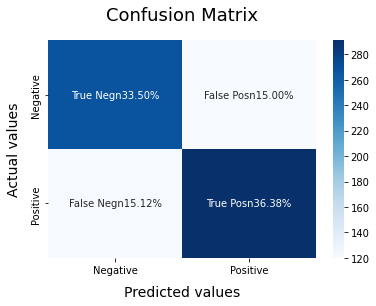

In [110]:
model_Evaluate(SVCmodel)

#Tabular data - Binary Classification

### Load modules

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import warnings

## Load data

In [195]:
titanic_dataset=pd.read_csv("/content/titanic-dataset.csv")
len_train=titanic_dataset.shape[0]

## Data Preprocessing

### EDA

In [196]:
titanic_dataset.dtypes.sort_values()

PassengerId      int64
Survived         int64
Pclass           int64
SibSp            int64
Parch            int64
Age            float64
Fare           float64
Name            object
Sex             object
Ticket          object
Cabin           object
Embarked        object
dtype: object

In [197]:
titanic_dataset.select_dtypes(include='int').head()

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0


In [198]:
titanic_dataset.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [199]:
titanic_dataset.select_dtypes(include='float').head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


### Find attributes with missing values

In [200]:
titanic_dataset.isnull().sum()[titanic_dataset.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Mitigate missing data

In [201]:
# fare
titanic_dataset.Fare=titanic_dataset.Fare.fillna(titanic_dataset.Fare.mean())

# cabin
titanic_dataset.Cabin=titanic_dataset.Cabin.fillna("unknow")

# embark
titanic_dataset.Embarked=titanic_dataset.Embarked.fillna(titanic_dataset.Embarked.mode()[0])

# age
titanic_dataset['title']=titanic_dataset.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknow,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknow,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknow,S,Mr


In [202]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

In [203]:
titanic_dataset['title']=titanic_dataset.title.map(newtitles)

In [204]:
titanic_dataset.groupby(['title','Sex']).Age.mean()

title    Sex   
Master   male       4.574167
Miss     female    21.804054
Mr       male      32.368090
Mrs      female    35.718182
Officer  female    49.000000
         male      46.562500
Royalty  female    40.500000
         male      42.333333
Name: Age, dtype: float64

In [205]:
def newage (cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 4.57
        elif title=='Miss' and Sex=='female':
            return 21.8
        elif title=='Mr' and Sex=='male': 
            return 32.37
        elif title=='Mrs' and Sex=='female':
            return 35.72
        elif title=='Officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.56
        elif title=='Royalty' and Sex=='female':
            return 40.50
        else:
            return 42.33
    else:
        return Age

In [206]:
titanic_dataset.Age=titanic_dataset[['title','Sex','Age']].apply(newage, axis=1)
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknow,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknow,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknow,S,Mr


### Feature Engineering

In [207]:
titanic_dataset['Relatives']=titanic_dataset.SibSp+titanic_dataset.Parch
titanic_dataset['Ticket2']=titanic_dataset.Ticket.apply(lambda x : len(x))
titanic_dataset['Cabin2']=titanic_dataset.Cabin.apply(lambda x : len(x))
titanic_dataset['Name2']=titanic_dataset.Name.apply(lambda x: x.split(',')[0].strip())

### Dropping features not required anymore

In [208]:
# ['PassengerId','Name','TicZZket','SibSp','Parch','Ticket','Cabin']
titanic_dataset.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

### Convert Single categorcial column to multiple binary columns

In [209]:
titanic_dataset = pd.get_dummies(titanic_dataset)

### Change type of target (float to int)


In [210]:
titanic_dataset.Survived=titanic_dataset.Survived.astype('int')

In [216]:
X = titanic_dataset.iloc[: , :-1].to_numpy()
y = titanic_dataset.iloc[: , -1].to_numpy()

### Train test split

In [217]:
# Separating the 95% data for training data and 5% for testing data, random state ensures consistency of split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =41)

In [ ]:
print(X_train[0])

## Training model - SVM (eg)

In [220]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred2 = SVCmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## Model Evaluation

In [221]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96       179
           1       0.00      0.00      0.00         0

    accuracy                           0.93       179
   macro avg       0.50      0.46      0.48       179
weighted avg       1.00      0.93      0.96       179



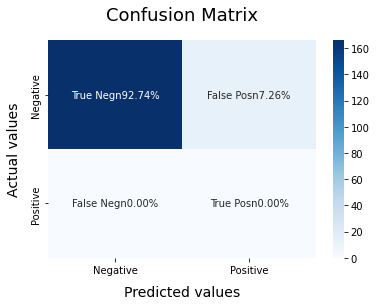

In [222]:
model_Evaluate(SVCmodel)